In [1]:
import sys
sys.path.append('../')

In [2]:
from torchsummary import summary
from models.googlenet import GoogLeNet
from library.utils import Utils, DataLoader

In [3]:
net = GoogLeNet().cuda()

summary(net, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           3,200
              ReLU-2         [-1, 64, 112, 112]               0
         MaxPool2d-3           [-1, 64, 55, 55]               0
            Conv2d-4           [-1, 64, 55, 55]           4,160
              ReLU-5           [-1, 64, 55, 55]               0
            Conv2d-6          [-1, 192, 55, 55]         110,784
              ReLU-7          [-1, 192, 55, 55]               0
         MaxPool2d-8          [-1, 192, 27, 27]               0
            Conv2d-9           [-1, 64, 27, 27]          12,352
           Conv2d-10           [-1, 96, 27, 27]          18,528
             ReLU-11           [-1, 96, 27, 27]               0
           Conv2d-12          [-1, 128, 27, 27]         110,720
             ReLU-13          [-1, 128, 27, 27]               0
           Conv2d-14           [-1, 16,

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss 0.309, train acc 0.884, test acc 0.864
3540.1 examples/sec on cuda:0


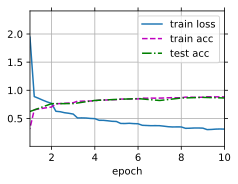

In [4]:
batch_size = 128

# GoogLeNet 模型的计算复杂，而且不如 VGG 那样便于修改通道数，为了简化运算，这里将图片 resize 到 96 x 96（通常情况下不会这样做）
train_iter, test_iter = DataLoader().load_data_fashion_mnist(batch_size=batch_size, resize=96)

lr, num_epochs = 0.02, 10
Utils.train(net, train_iter, test_iter, num_epochs, lr, Utils.try_gpu())